# Avant toute chose ... 

Colab nous autorise à utiliser des ressources distribuées, mais ne nous mets pas par défaut sur l'option la plus performante. A partir de ce notebook, nous allons réaliser des modèles plus complexes qui demandent une grande capacité computationnelle. 

Afin de profiter de meilleures performances : aller dans l'onglet **Runtime** -> **change runtime type** (en français : **Execution** -> **changer le type d'execution**)  et sélectionner l'option **GPU** pour **hardware accelerator**

( Normalement automatique à l'utilisation de ce notebook, mais mieux vaut vérifier avant) 

# Reprenons ! 
Commençons par recharger les données et reformater ces dernières de la même manière que précedemment : 



In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-11-17 23:20:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  90.0MB/s    in 0.7s    

2019-11-17 23:20:28 (90.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Le réseau de convolution 

Il existe d'autres types de réseaux de neurones que les réseaux denses. En connectant les couches d'une manière différente ou en utilisant des mécanismes de retenue d'information, il est possible de construire des modèles plus adaptés à certaines formes de données (suites temporelles, informations spatiales globales ou locales, etc ... )

Un exemple de ces types de réseaux est le réseau de convolution. Ces réseaux sont très utilisés dans le traitement d'image et dans la recherche d'information spatiale. Ils agissent comme des filtres de recherche d'éléments à forte valeur visuelle (coin, bordures, contours, ...) qui sont de plus en plus complexes au fur et à mesure que l'on rajoute des couches. 

Prenons en exemple le réseau de convolution suivant : 







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 87617     
Total params: 88,065
Trainable params: 88,065
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Using TensorFlow backend.





Epoch 1/15





 - 14s - loss: 2.1956 - acc: 0.5490 - val_loss: 0.6283 - val_acc: 0.6420
Epoch 2/15
 - 7s - loss: 0.5860 - acc: 0.6950 - val_loss: 0.6152 - val_acc: 0.6500
Epoch 3/15
 - 7s - loss: 0.4796 - acc: 0.7810 - val_loss: 0.6196 - val_acc: 0.6610
Epoch 4/15
 - 7s - loss: 0.3913 - acc: 0.8465 - val_loss: 0.6602 - val_acc: 0.6650
Epoch 5/15
 - 7s - loss: 0.3158 - acc: 0.8910 - val_loss: 0.6540 - val_acc: 0.6610
Epoch 6/15
 - 7s - loss: 0.2563 - acc: 0.9225 - val_loss: 0.6603 - val_acc: 0.6590
Epoch 7/15
 - 7s - loss: 0.2069 - acc: 0.9480 - val_loss: 0.6498 - val_acc: 0.6750
Epoch 8/15
 - 7s - loss: 0.1619 - acc: 0.9695 - val_loss: 0.9177 - val_acc: 0.6360
Epoch 9/15
 - 7s - loss: 0.1290 - acc: 0.9700 - val_loss: 0.8238 - val_acc: 0.6580
Epoch 10/15
 - 7s - loss: 0.0988 - acc: 0.9855 - val_loss: 1.0580 - val_acc: 0.5920
Epoch 11/15
 - 7s - loss: 0.0812 - acc: 0.9845 - val_loss: 0.7424 - val_acc: 0.6770
Epoch 12/15
 - 7s - loss: 0.0625 - acc: 0.9910 - val_loss: 0.9139 - val_acc:

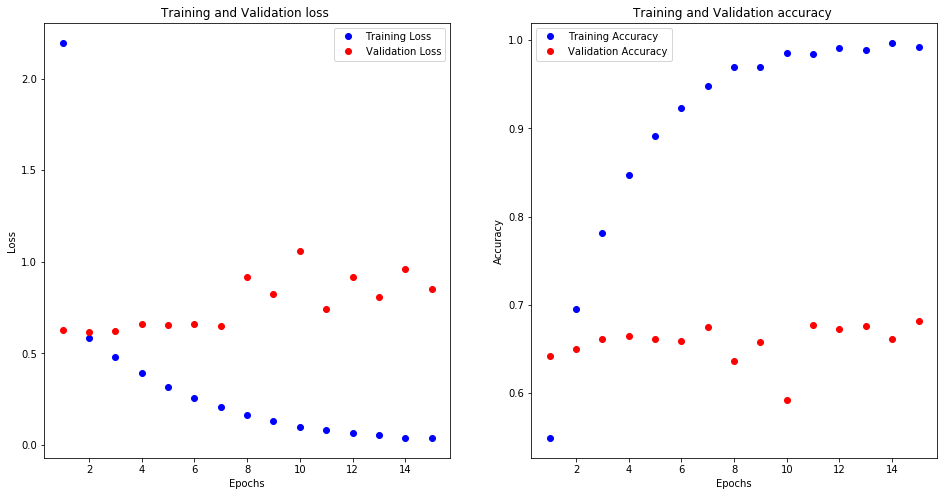

In [5]:
# Paramètres modifiables 
epochs = 15
nodes = 128 
from tensorflow.keras.optimizers import RMSprop
import keras
import matplotlib.pyplot as plt 
from keras import models 
from keras import layers 



conv_model = models.Sequential()
conv_model.add(layers.Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
conv_model.add(layers.MaxPooling2D(2))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(1,activation='sigmoid'))

conv_model.summary()
conv_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])


history = conv_model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.plot(x,val_loss_values,'ro',label='Validation Loss')
ax1.set_title('Training and Validation loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(x,acc_values,'bo',label='Training Accuracy')
ax2.plot(x,val_acc_values,'ro',label='Validation Accuracy')
ax2.set_title('Training and Validation accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

Il apprend bien mieux que le réseau précédent ! On arrive à 99% de précision sur le jeu de données d'entrainement ! 

Et pourtant, il arrive quelque chose d'étrange : la courbe de validation ne suit pas ... Au contraire, à partir d'un moment, plus on s'entraine, plus elle devient mauvaise. 

Il s'avère que notre réseau vient de commettre une grave erreur : il a fait de l'overfitting (sur-apprentissage, ou sur-interprétation en français). Il s'est spécialisé spécifiquement sur les données qu'il a dans on jeu d'entrainement, tellement qu'il n'arrive plus à bien généraliser sur des données similaires mais différentes ! 
